In [1]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Histogram

The histogram of an image represents the frequency distribution of the different shades of an image layer. Two examples are given below :
- one with a grayscale image, the cameraman, where the values represent the different shades of gray,
- one with an RGB-coloured image, the astronaut, where three curves can be observed : one histogram for each colour of the colour space.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera,astronaut
plt.style.use('ggplot')

C:\Program Files\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


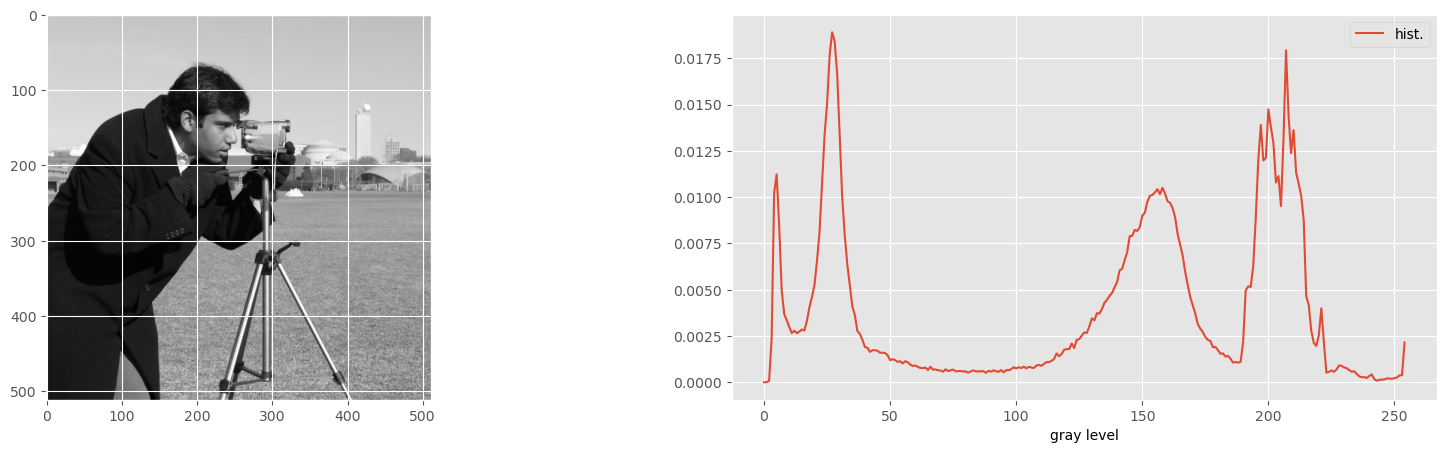

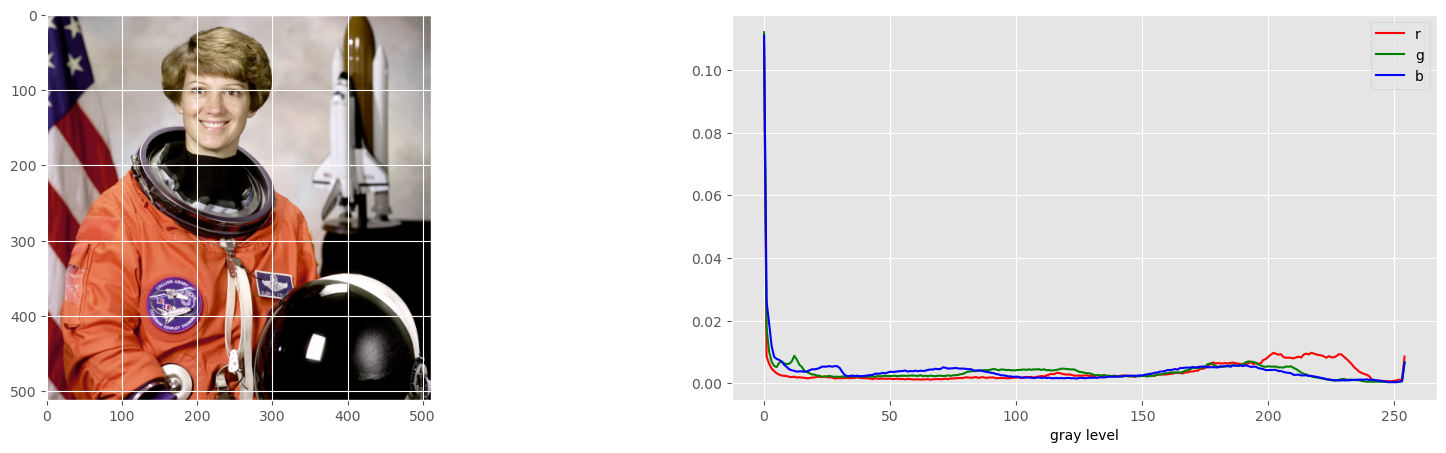

In [3]:
def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima,vmin=None,vmax=None):
    plt.figure(figsize=[20,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=cm.gray,vmin=vmin,vmax=vmax)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level');
    
display_hist(camera())
display_hist(astronaut())

A common thing done is to compute the cumulative histogram of an image. The cumulative histogram is useful for some operations such as image histogram equalisation, that will be overviewed later. In order to compute said cumulative histogram :
1. the frequencies must be successively added (the values becoming the amount of pixels of a certain shade or lower shade),
2. the values must be normalized to the number of shades (the values being then the percentage of pixels of a particular shade or lower shade), and compiled into an array,
3. the normalized array can then be plotted.

An example is given below with a grayscale image, the cameraman.

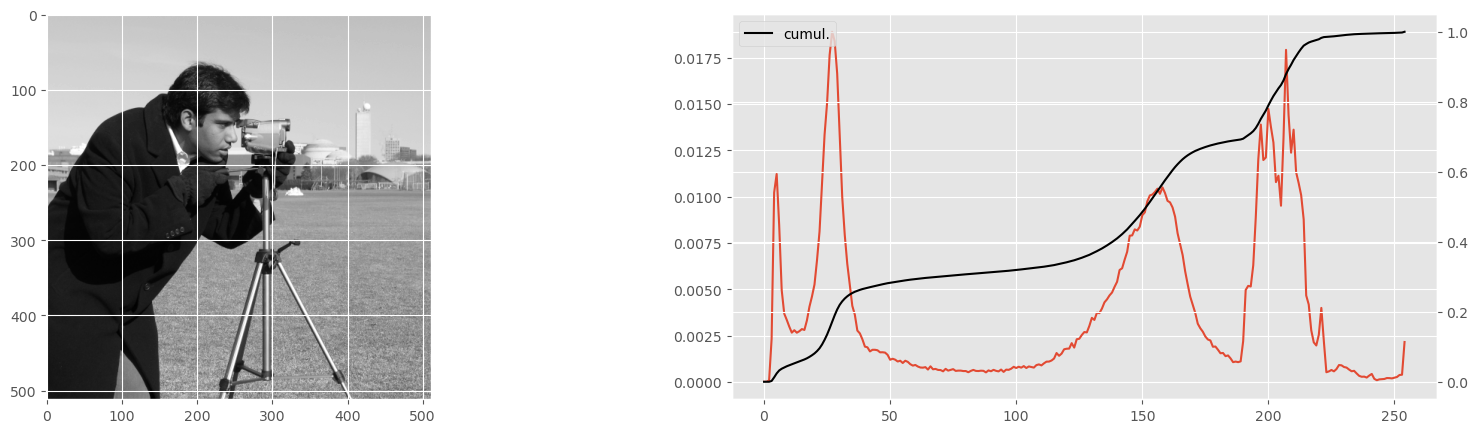

In [4]:
def display_hist2(ima):
    nh = norm_hist(ima)
    cumul_hist = np.cumsum(nh)
    
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=cm.gray)
    ax1 = plt.subplot(1,2,2)
    plt.plot(nh)
    ax2 = ax1.twinx()
    plt.plot(cumul_hist,label='cumul.',color='k')
    plt.legend()
    
display_hist2(camera())

# Look-Up Table

A look-up table or more simply LUT is a table of input and output values. It is a preset that allows to change the values of the pixels of an image, following a simple function. It changes the color but also the contrast, tones, ... Each RGB combination of color, or more simply each gray shade, has a new value assigned.

Examples of such LUTs are given below, but only for 8-bits images. They can of course be generalized for any kind of integer image, however, due to memory limitation, the LUT method will be used only with bit-depth limited images.
> In the next sections, $g_{in}$ represents the input gray value and $g_{out}$ represents the output gray value. A LUT is thus a function $g_{out}(g_{in})$

In [5]:
def apply_lut(ima,lut,vmin=None,vmax=None):
    nh = norm_hist(ima)
    lima = lut[ima]
    nh_lima = norm_hist(lima)
    
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.imshow(lima,cmap=cm.gray,vmin=vmin,vmax=vmax)
    ax1 = plt.subplot(1,2,2)
    plt.plot(nh,label='ima')
    plt.plot(nh_lima,label='lut[ima]')
    plt.legend(loc='upper left')
    ax2 = ax1.twinx()
    plt.plot(lut,label='lut',color='k')
    plt.legend()

## Negative

The function for the negative LUT is given by the next equation.
$$g_{out} = 255 - g_{in}$$

To apply this LUT to the complete image, which consists in inverting the value of every pixel, the LUT method is used, which consist in pre-computing the transformed levels for all the 255 possible gray levels into one vector. The image transformation is then a simple vector addressing.

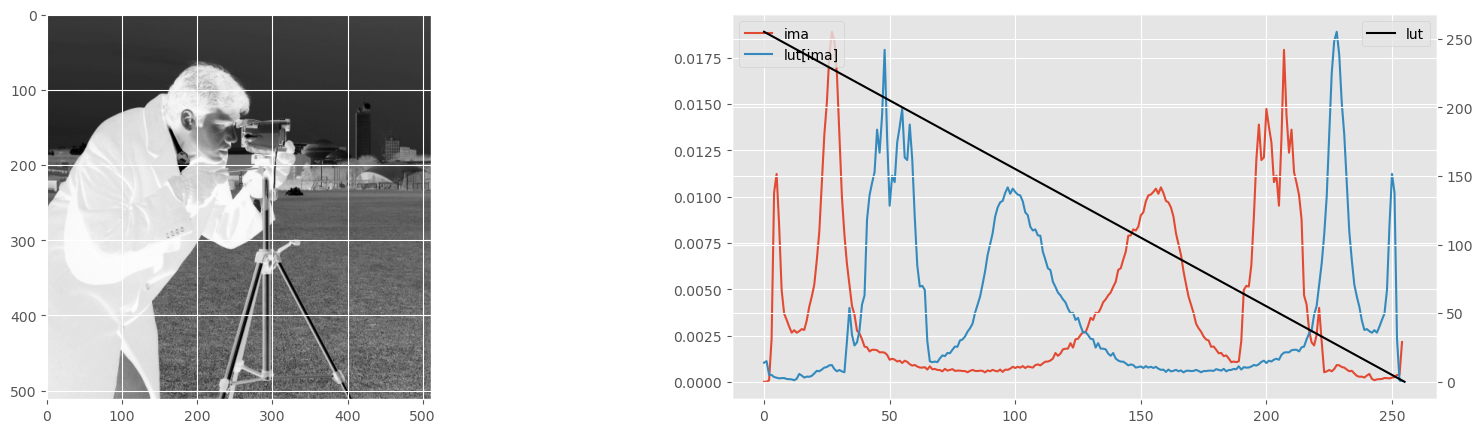

In [6]:
# LUT invertion    
ima = camera()
lut = np.arange(255,-1,-1)
apply_lut(ima,lut)

## Threshold

The function for the threshold LUT is given by the next equation.
$$
\begin{align*}
g_{out} =
\begin{cases}
    255 & \textrm{ if } g_{in}>th \\
    0 & \textrm{ otherwise }
\end{cases}
\end{align*}
$$

Again, to apply this LUT to the complete image, the LUT method  is used : the transformed levels for all the 255 possible gray levels are pre-computed into one vector, and the image transformation is thus a simple vector addressing.

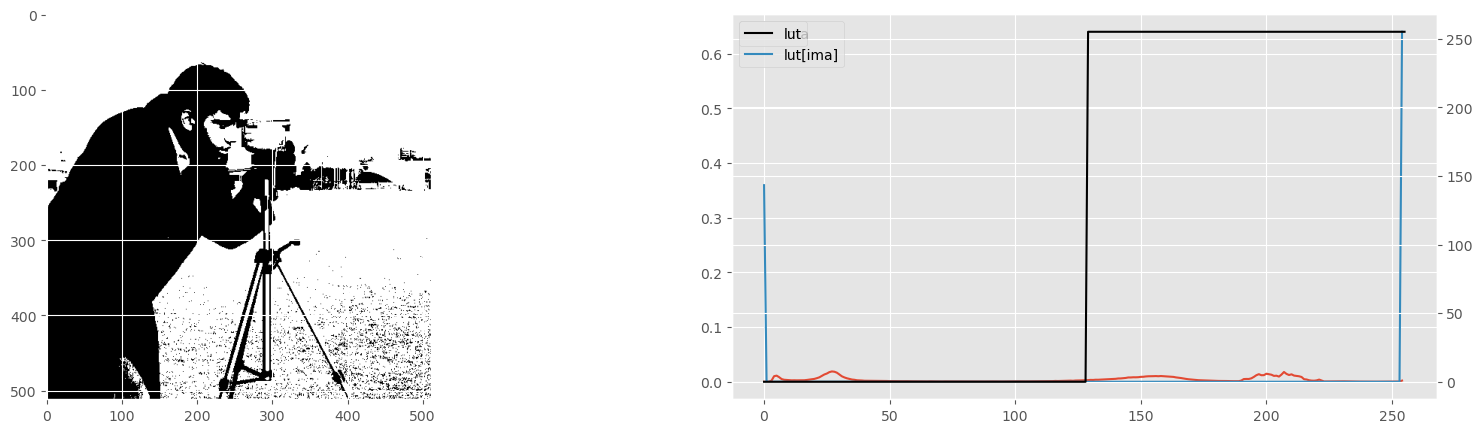

In [7]:
def lut_threshold(th):
    lut = np.arange(0,256)
    lut = 255 * (lut > th)
    return lut 

apply_lut(ima,lut_threshold(128))

## Semi-threshold

The function for the semi-threshold LUT is given by the next equation.
$$
\begin{align*}
g_{out} =
\begin{cases}
    g_{in} & \textrm{ if } g_{in}>th \\
    0 & \textrm{ otherwise }
\end{cases}
\end{align*}
$$

Again, to apply this LUT to the complete image, the LUT method  is used : the transformed levels for all the 255 possible gray levels are pre-computed into one vector, and the image transformation is thus a simple vector addressing.

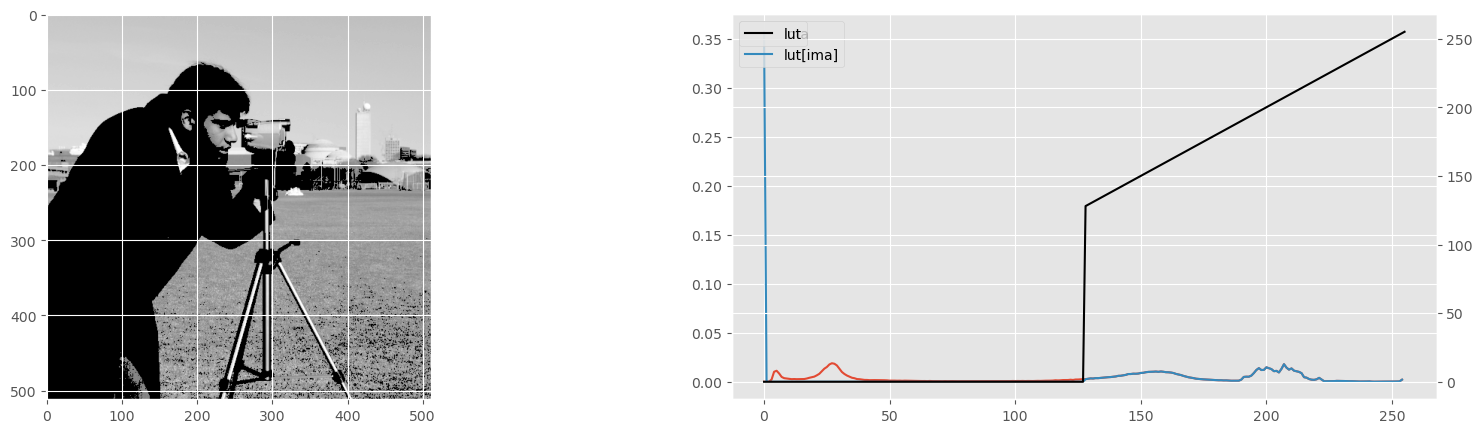

In [8]:
def lut_semi_threshold(th):
    lut = np.arange(0,256)
    lut[lut < th] = 0
    return lut 

apply_lut(ima,lut_semi_threshold(128))

## Gamma correction

The gamma correction LUT is used to reinforce contrast of the image. The function of this LUT is given by the next equation :
$$g_{out} = A \cdot g_{in}^{\gamma}$$
where $ A = 255^{(1-\gamma)}$ and the influence of the parameter $\gamma$ is the following :
- if $\gamma < 1$ the low-level are contrasted,
- if $\gamma >1$ the bright parts of the image are contrasted.

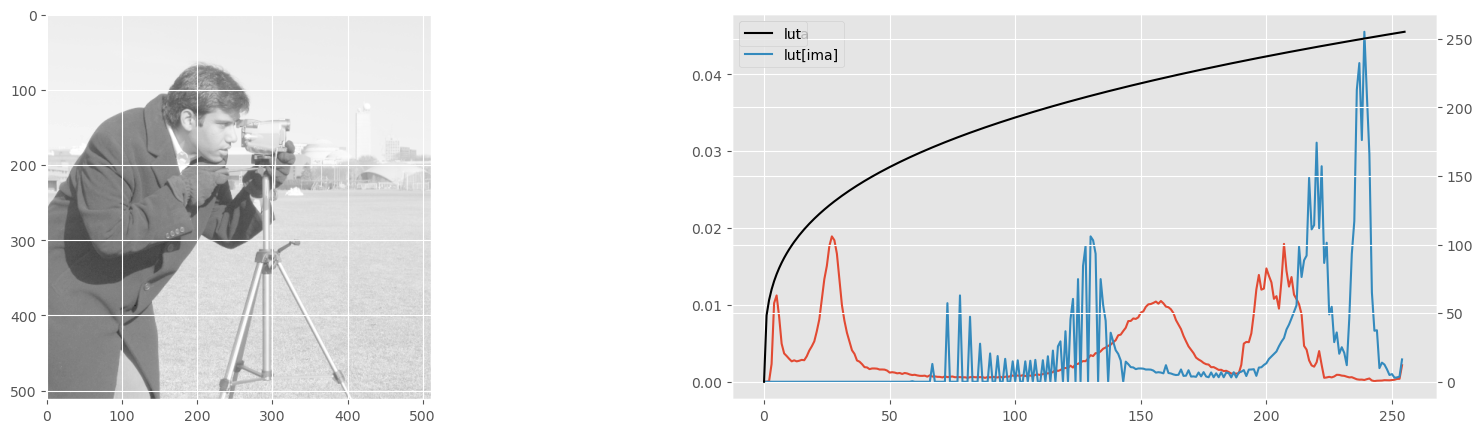

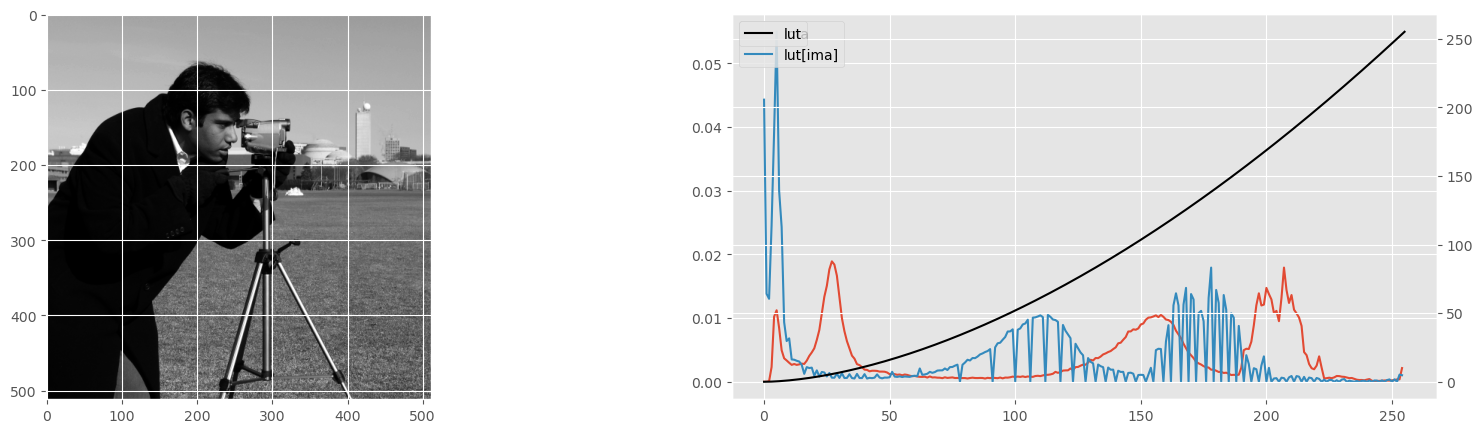

In [9]:
def lut_gamma(gamma):
    lut = np.power(np.arange(0,256),gamma) * np.power(255,1-gamma)
    return lut 

apply_lut(ima,lut_gamma(0.3))
apply_lut(ima,lut_gamma(1.7))

## Auto-level

The auto-level LUT remaps the complete image dynamic scale of the image to the full dynamic scale of all possible shades : it extends the range of values of the image. The function of this LUT is given by the following equation :
$$g_{out} = 255 \cdot \frac{g_{in} - g_{min}}{g_{max}-g_{min}}$$
where $g_{min}$ and $g_{max}$ are respectively the minimimal and maximal values present in the image.

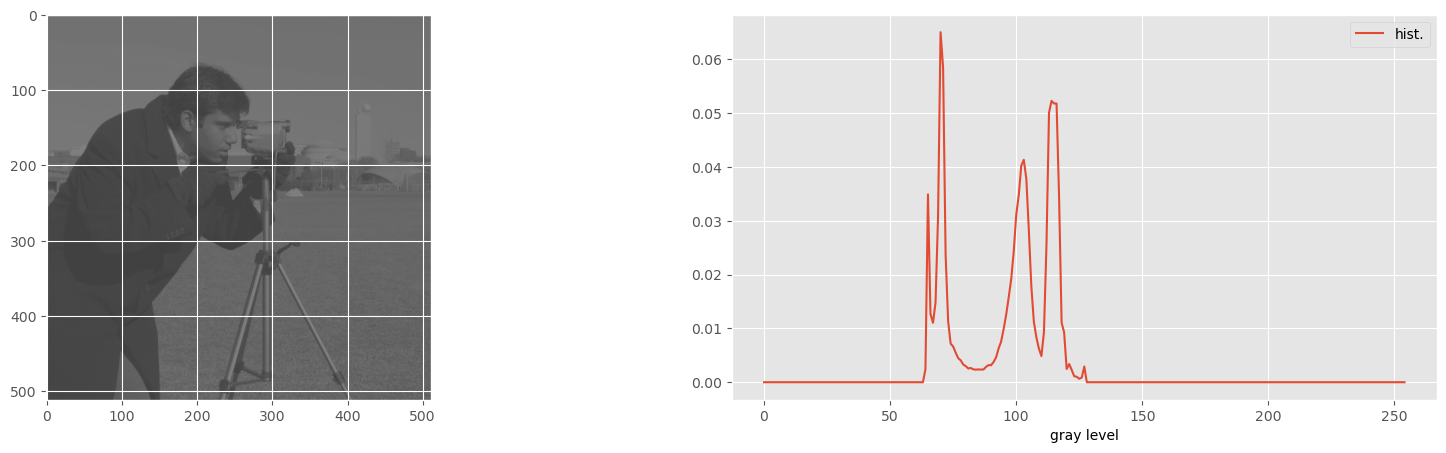

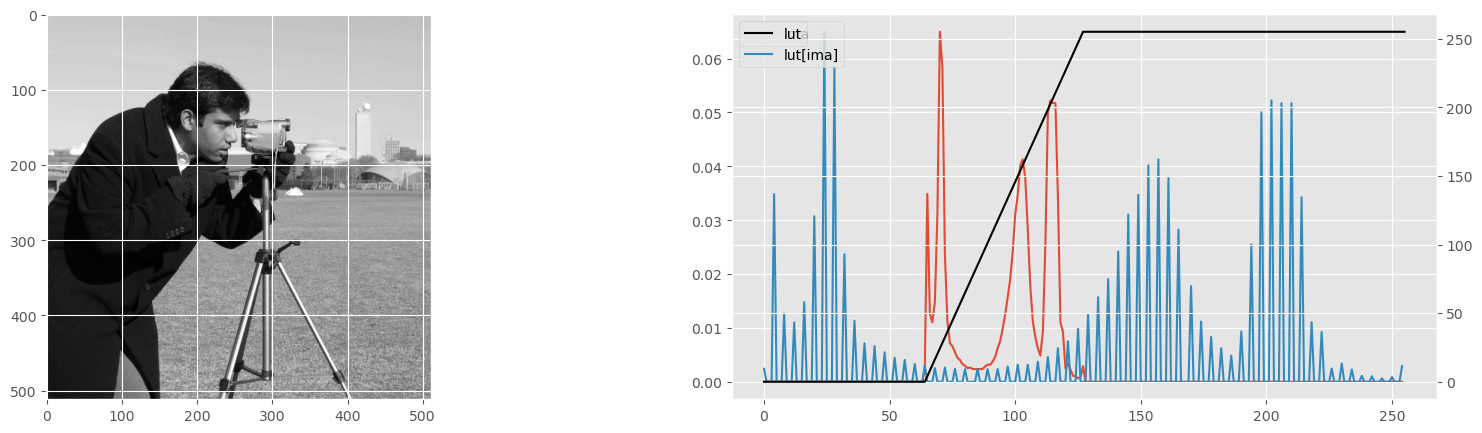

In [10]:
def lut_autolevel(ima):
    g_min = np.min(ima)
    g_max = np.max(ima)
    lut = 255*(np.arange(0,256)-g_min)/(1.*g_max-g_min)
    lut[0:g_min]=0
    lut[g_max:] = 255
    return lut

ima=camera()
t_ima = (ima/4+64).astype(np.uint8)
display_hist(t_ima,vmin=0,vmax=255)
apply_lut(t_ima,lut_autolevel(t_ima))

## Equalization

One may be interested in using as many gray levels possible for frequent levels, and in grouping rare levels. This is called histogram equalization since, after the operation, the histogram distribution is more equal, more dispersed.
The next figure illustrate equalization done of the cameraman picture. 

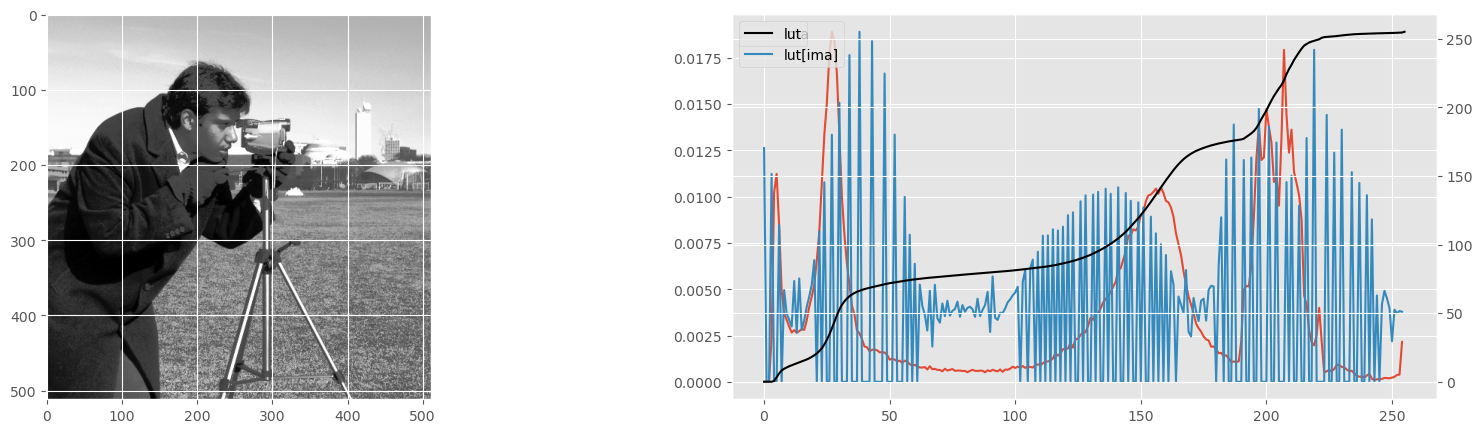

In [11]:
def lut_equalization(ima):
    nh = norm_hist(ima)
    ch = np.append(np.array(0),np.cumsum(nh))
    lut = 255*ch
    return lut
apply_lut(ima,lut_equalization(ima))

As shown on the histogram, levels frequently observed, corresponding to the pixels in the sky, are now more spread : the contrast is increased, and the same phenomenon happens inside the cameraman where details are now visible on his jacket and on his hands.
The histogram is not perfectly equal, this is due to the LUT used : pixels having an equal gray level are transform similarily, they cannot be separated.

By looking into the code used to achieve the former equalization, the LUT can be found : it is simply the cummulative histogram ! That is why it has been introduced before. And the justification of that is given hereunder.
1. The histogram is first normalized, setting the values of all the gray levels between 0 and 1. The normalized histogram is then cumulated to get a cumulative normalized histogram. The probability of a gray level is thus given by the following equation :
$$
p_r(r) = \frac{n_r}{n}\\
0 \leq r \leq 1\\
$$
where $n_r$ is the number of pixels having the value $r$ anf $n$ the total number of image pixels.

2. The transformation $T$ maps the gray levels $r$ to the gray levels $s$, as presented in the following equations.
$$
s = T(r)\\
0 \le T(r) \le 1\\
r = T^{-1}(s)
$$
$T(r)$ is thus considered as monotically increasing on $0 \le r \le 1$. It is then also assumed that $T^{-1}(s)$ is monotically increasing on $0 \le s \le 1$ and bounded to $[0,1]$.

3. From the theory of probabilities, the probability density function of the transformed gray level is thus given by the following equation.
$$
p_s(s) = \left[p_r(r)\frac{dr}{ds}\right]_{r=T^{-1}(s)}
$$

4. By considering the transform function $T(r) = s = \displaystyle\int _0 ^r p_r(w) dw$ for $0 \leq r \leq 1$ then the derivative $\dfrac{ds}{dr} = p_r(r)$, which can easily be subsituted in the previous equation, the latter being then quickly solved :
$$
\begin{align*}
p_s(s) &= \left[ p_r(r) \frac{1}{p_r(r)} \right]_{r=T^{-1}(s)} \\
&= \left[ 1 \right]_{r=T^{-1}(s)} \\
&= 1
\end{align*}
$$
which is uniform on the interval $0 \leq s \leq 1$.

Another more practical example is given below with an x-ray image of a chest : image histogram equalization makes a lung cancer visible in the image.

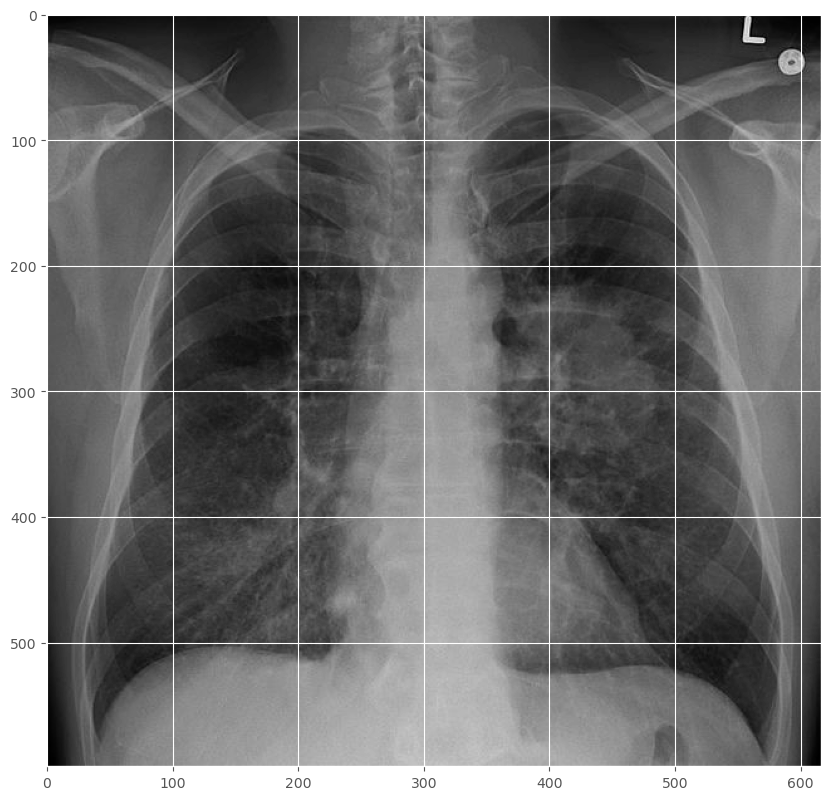

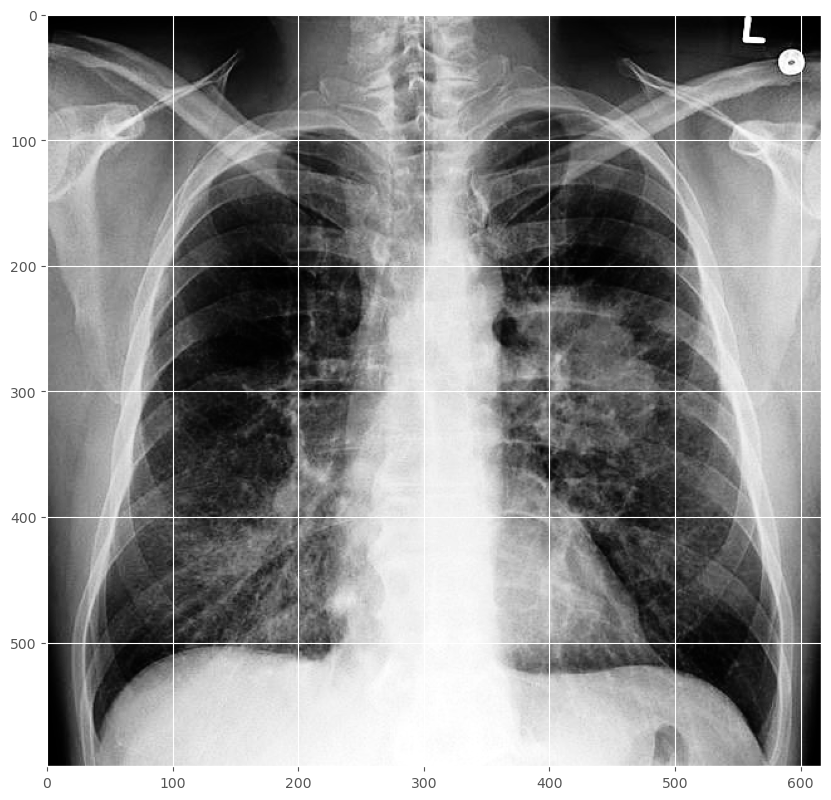

In [12]:
#other example
from skimage.io import imread
ima = imread('../data/Lung_Cancer_on_Chest_X-Ray.jpg')[:,:,0]
lut = lut_equalization(ima)
plt.figure(figsize=[10,10])
plt.imshow(ima,cmap=cm.gray)
plt.figure(figsize=[10,10])
plt.imshow(lut[ima],cmap=cm.gray);


if we need to increase the conrtrast in a certain part of the image, equalization LUT may be restricted to a certain area:

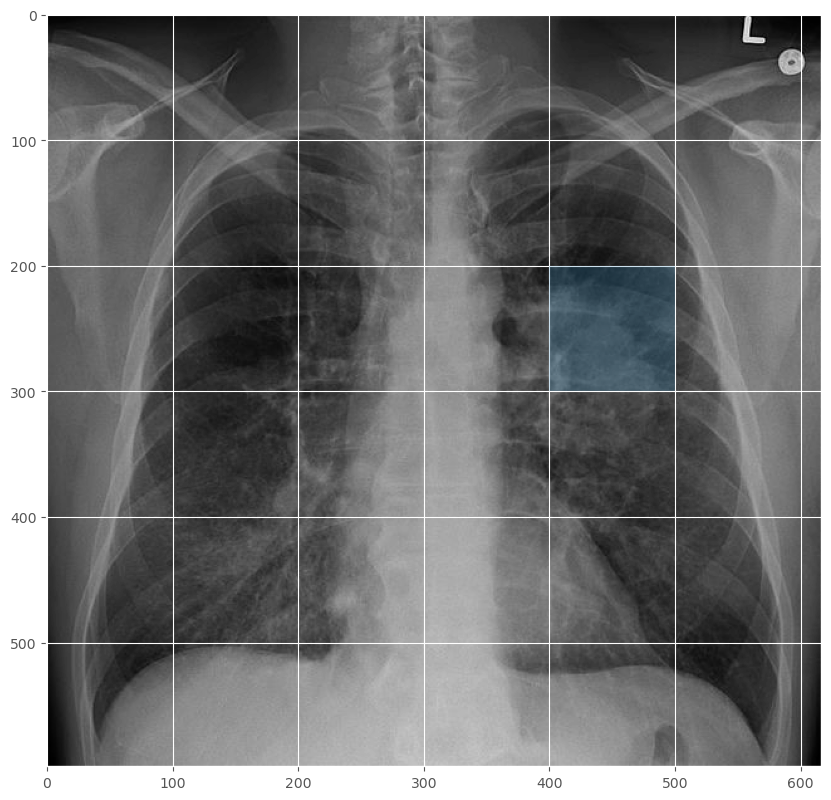

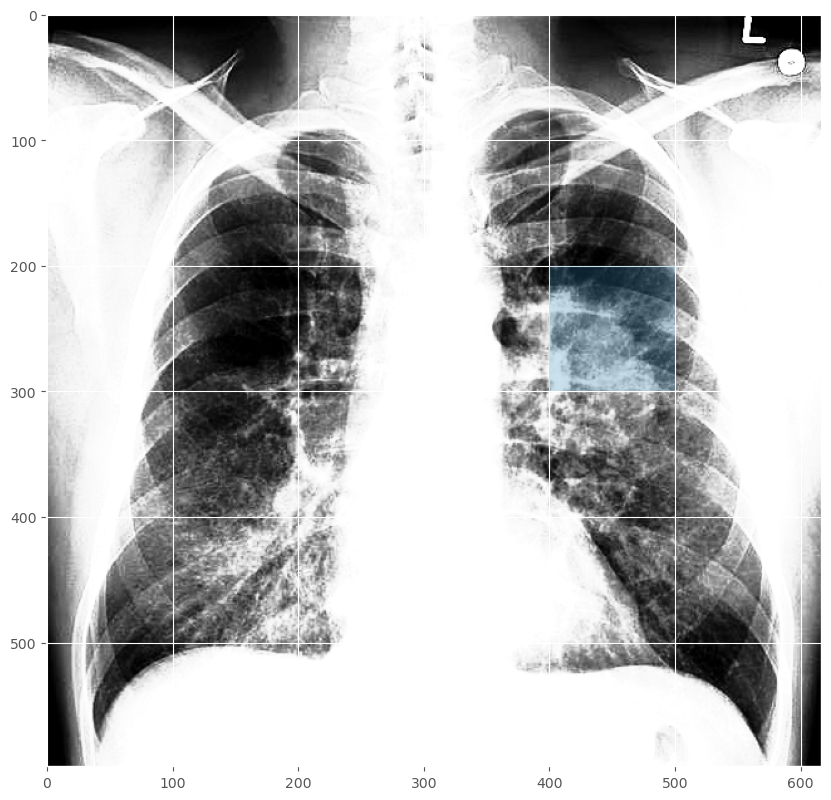

In [13]:
roi = [(400,200),100,100]
sample = ima[roi[0][1]:roi[0][1]+roi[2],roi[0][0]:roi[0][0]+roi[1]]
lut = lut_equalization(sample)

plt.figure(figsize=[10,10])
plt.imshow(ima,cmap=cm.gray)
rect = plt.Rectangle(*roi, facecolor=None,alpha=.25)
plt.gca().add_patch(rect)


plt.figure(figsize=[10,10])
plt.imshow(lut[ima],cmap=cm.gray);
rect = plt.Rectangle(*roi, facecolor=None,alpha=.25)

plt.gca().add_patch(rect);

